In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
fractures = ["0_10","0_13","0_14","0_15","0_16","1_1","1_2","1_15","2_0","2_1","2_2","2_3","3_0","3_1","3_2","3_3","4_0","4_1","4_2","4_3","4_9","4_10","5_3","5_6","5_7","5_9","5_10","5_11","5_17","5_18","6_3","6_4","6_5","6_6","6_7","6_8","6_9","6_10","6_11","6_18","7_0","7_3","7_4","7_5","7_6","7_7","7_8","7_10","7_11","7_12","7_17","7_18","8_0","8_1","8_2","8_3","8_4","8_5","8_6","8_7","8_8","8_10","8_12","8_13","9_1","9_2","9_6","9_7","9_8","9_9","9_13","9_14","10_8","10_9","10_10","10_13","10_14","10_18","10_19","11_9","11_10","11_11","11_12","11_14","11_15","11_16","11_17","11_18","11_19","12_9","12_10","12_11","12_12","12_13","12_14","12_15","12_16","12_17","12_18","12_19","13_1","13_8","13_9","13_10","13_11","13_12","13_13","13_14","13_19","14_1","14_4","14_5","14_8","14_12","15_6","15_9","15_17","16_5","16_6","17_2","17_3","17_4","17_5","17_6","17_7","17_13","18_2","18_3","18_4","18_5","18_6","18_7","18_12","19_2","19_3","19_4","19_5","19_6","19_7","19_8"]

In [6]:
for i in fractures:
    img_cleaned = Image.open(f"data/data/v4_split_image/fracture_cleaned/edge_v4_{i}.jpg")
    gray_image = img_cleaned.convert('L')
    # Save the grayscale image
    gray_image.save(f"data/data/v4_split_image/fracture_cleaned/edge_v4_{i}.jpg")
    '''
    arr = np.array(gray_image)
    count = 0
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            if arr[i][j] >= 220:
                count += 1
    print(count)
    print(count/(len(arr)*len(arr[0])))
    '''

In [5]:
from PIL import Image

# Open the original image
img = Image.open("data/data/v4_split_image/v4_17_12.png")
print(img.size)

# Open the mask image
mask = Image.open("data/data/v4_split_image/fracture_cleaned/v4_17_12.jpg").convert('L')
print(mask.size)

# Blend the images
blended = Image.blend(img, mask, alpha=0.2)

# Save the result
blended.save('blended_image.png')

(1986, 1702)
(1986, 1702)


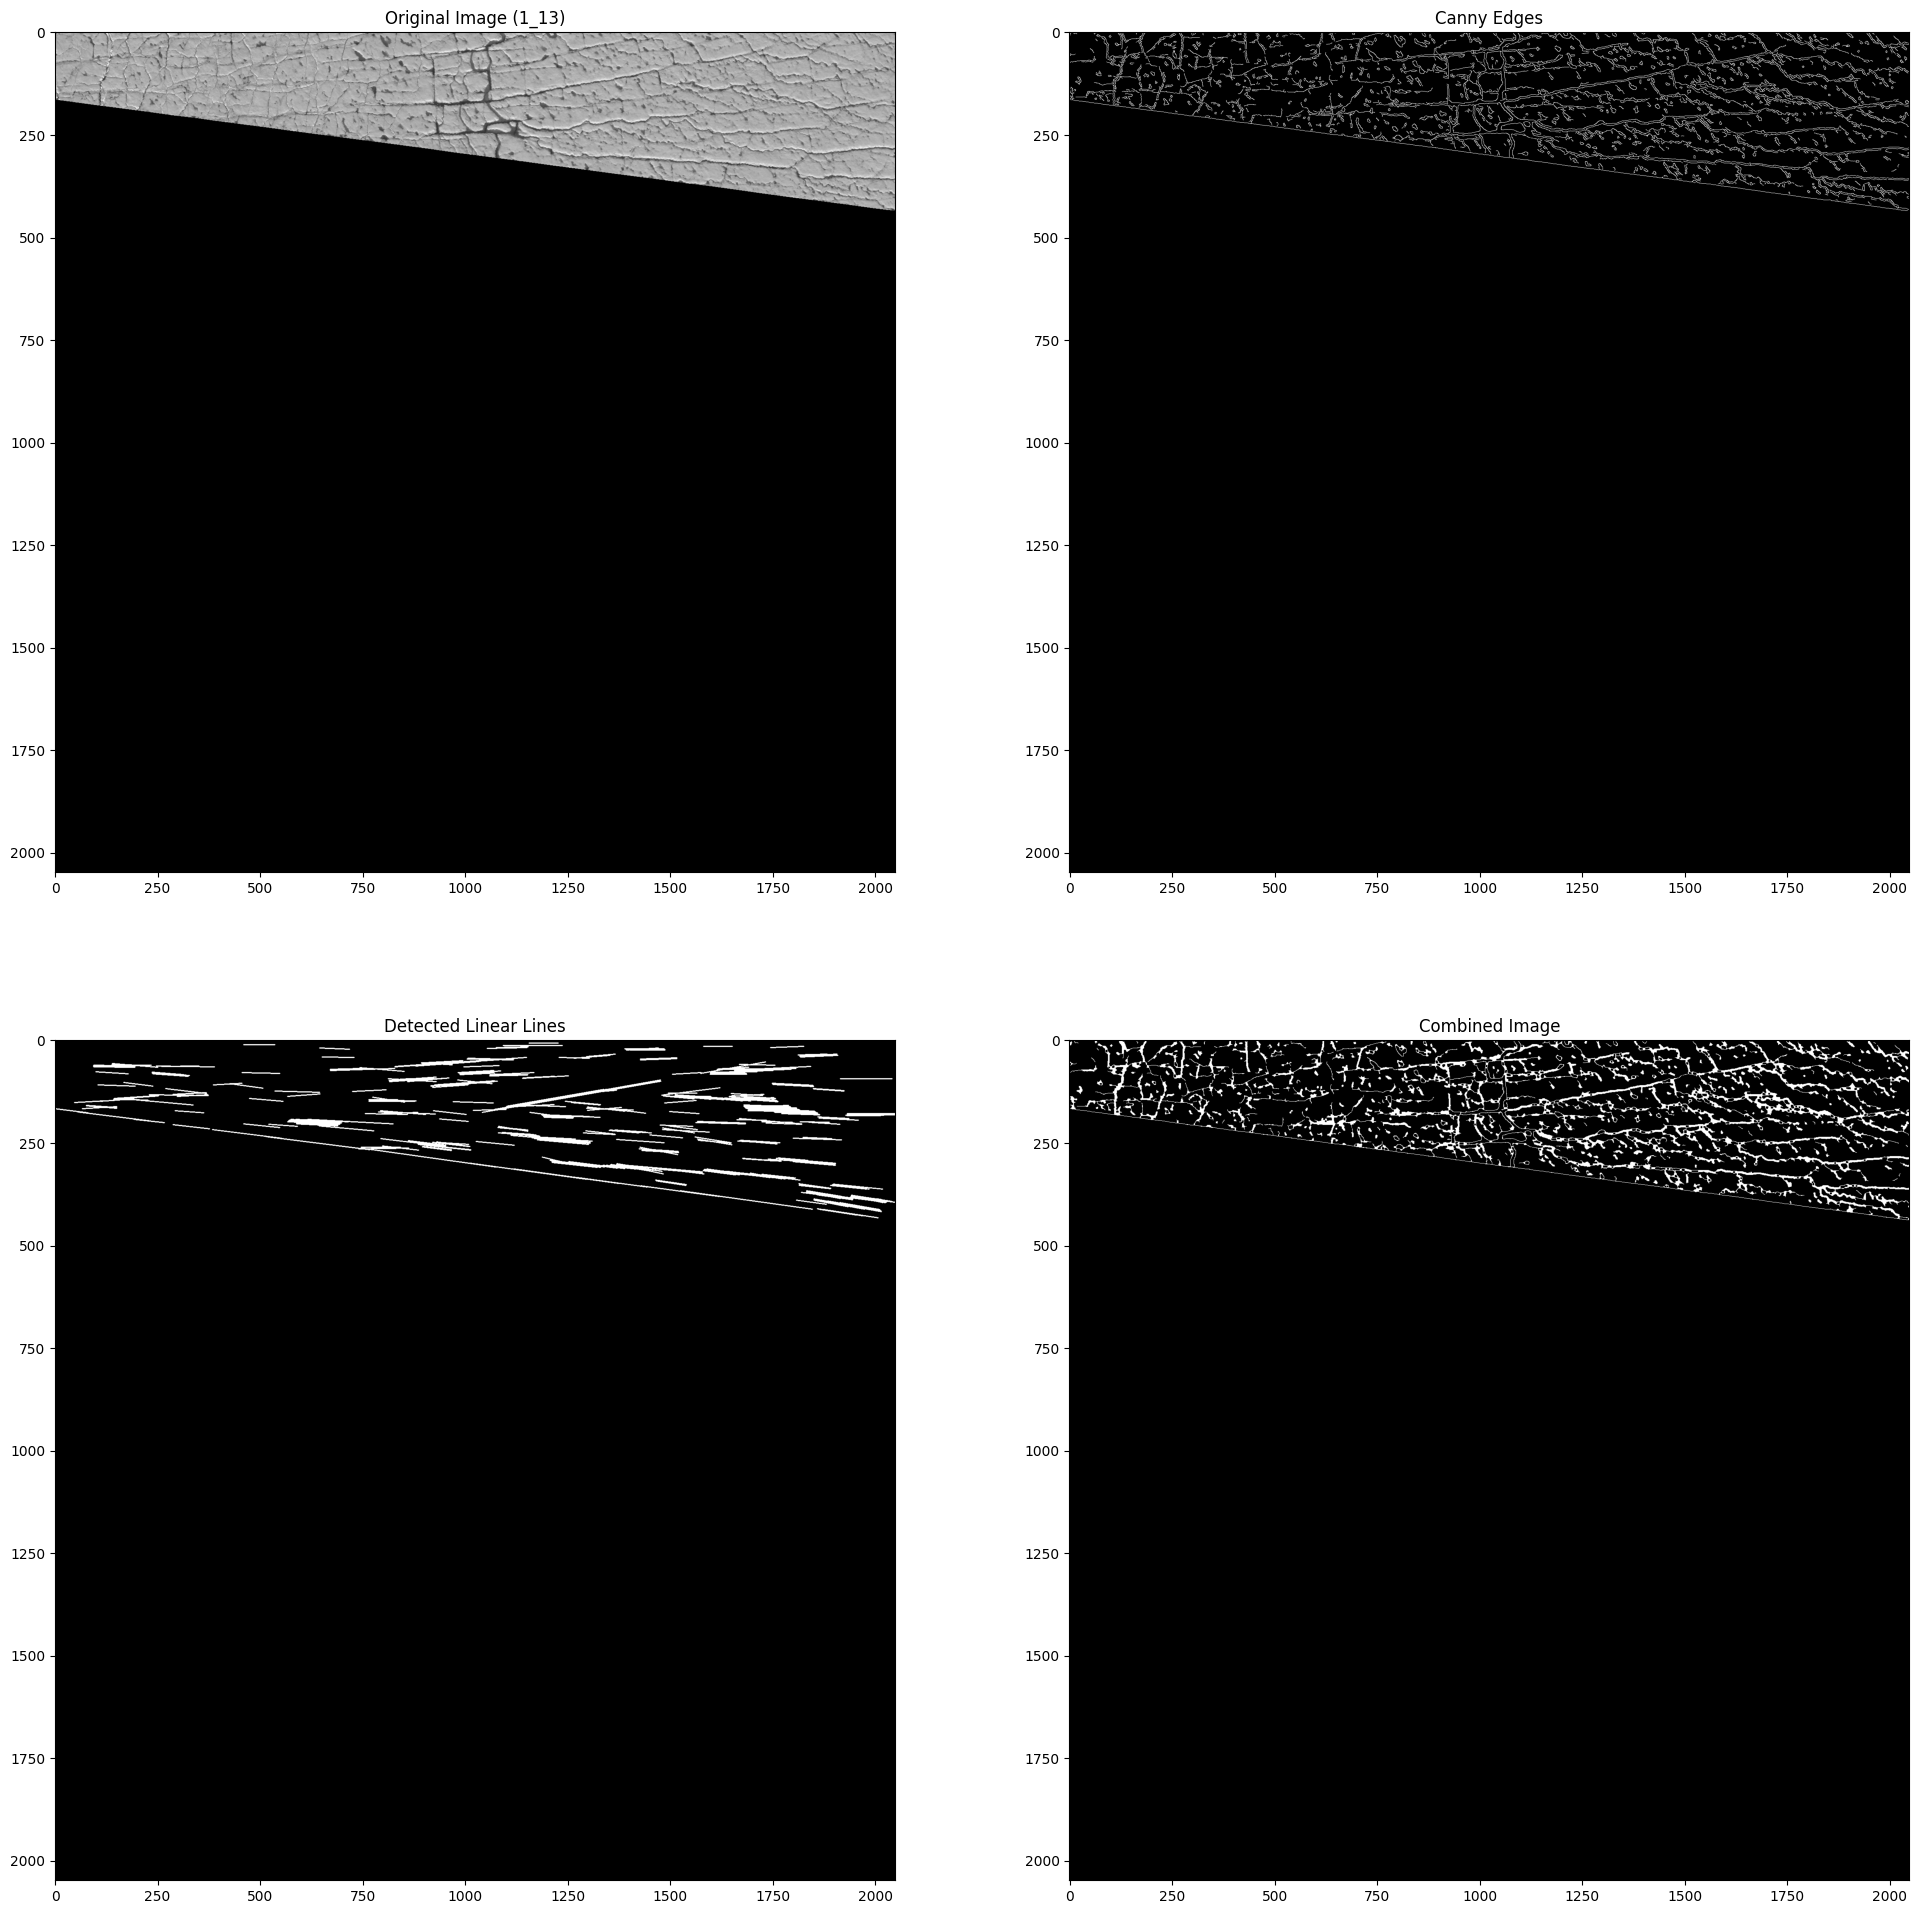

In [14]:
#FOR FRACTURES
i = "1_13"
img = cv2.imread(f"data/data/extra_training_data/orig_{i}.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=55, threshold2=110)

kernel = np.ones((2, 2), np.uint8)

# Apply morphological closin
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=3)

lines = cv2.HoughLinesP(closed, 1, np.pi/180, threshold=150, minLineLength=70, maxLineGap=20)

# Create an empty image to draw lines
line_image = np.zeros_like(img)

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), 255, 2)

# Combine the line image with the original image
combined = cv2.addWeighted(closed, 1, line_image, 0, 0)
output_path_combined = f'data/data/extra_training_data/fracture_edge_detection/fracture_{i}.png'
cv2.imwrite(output_path_combined, combined)

# Plot the results
plt.figure(figsize=(24,24))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image ({i})')
plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(2, 2, 3), plt.imshow(line_image, cmap='gray'), plt.title('Detected Linear Lines')
plt.subplot(2, 2, 4), plt.imshow(combined, cmap='gray'), plt.title('Combined Image')
plt.savefig("test.png")
plt.show()

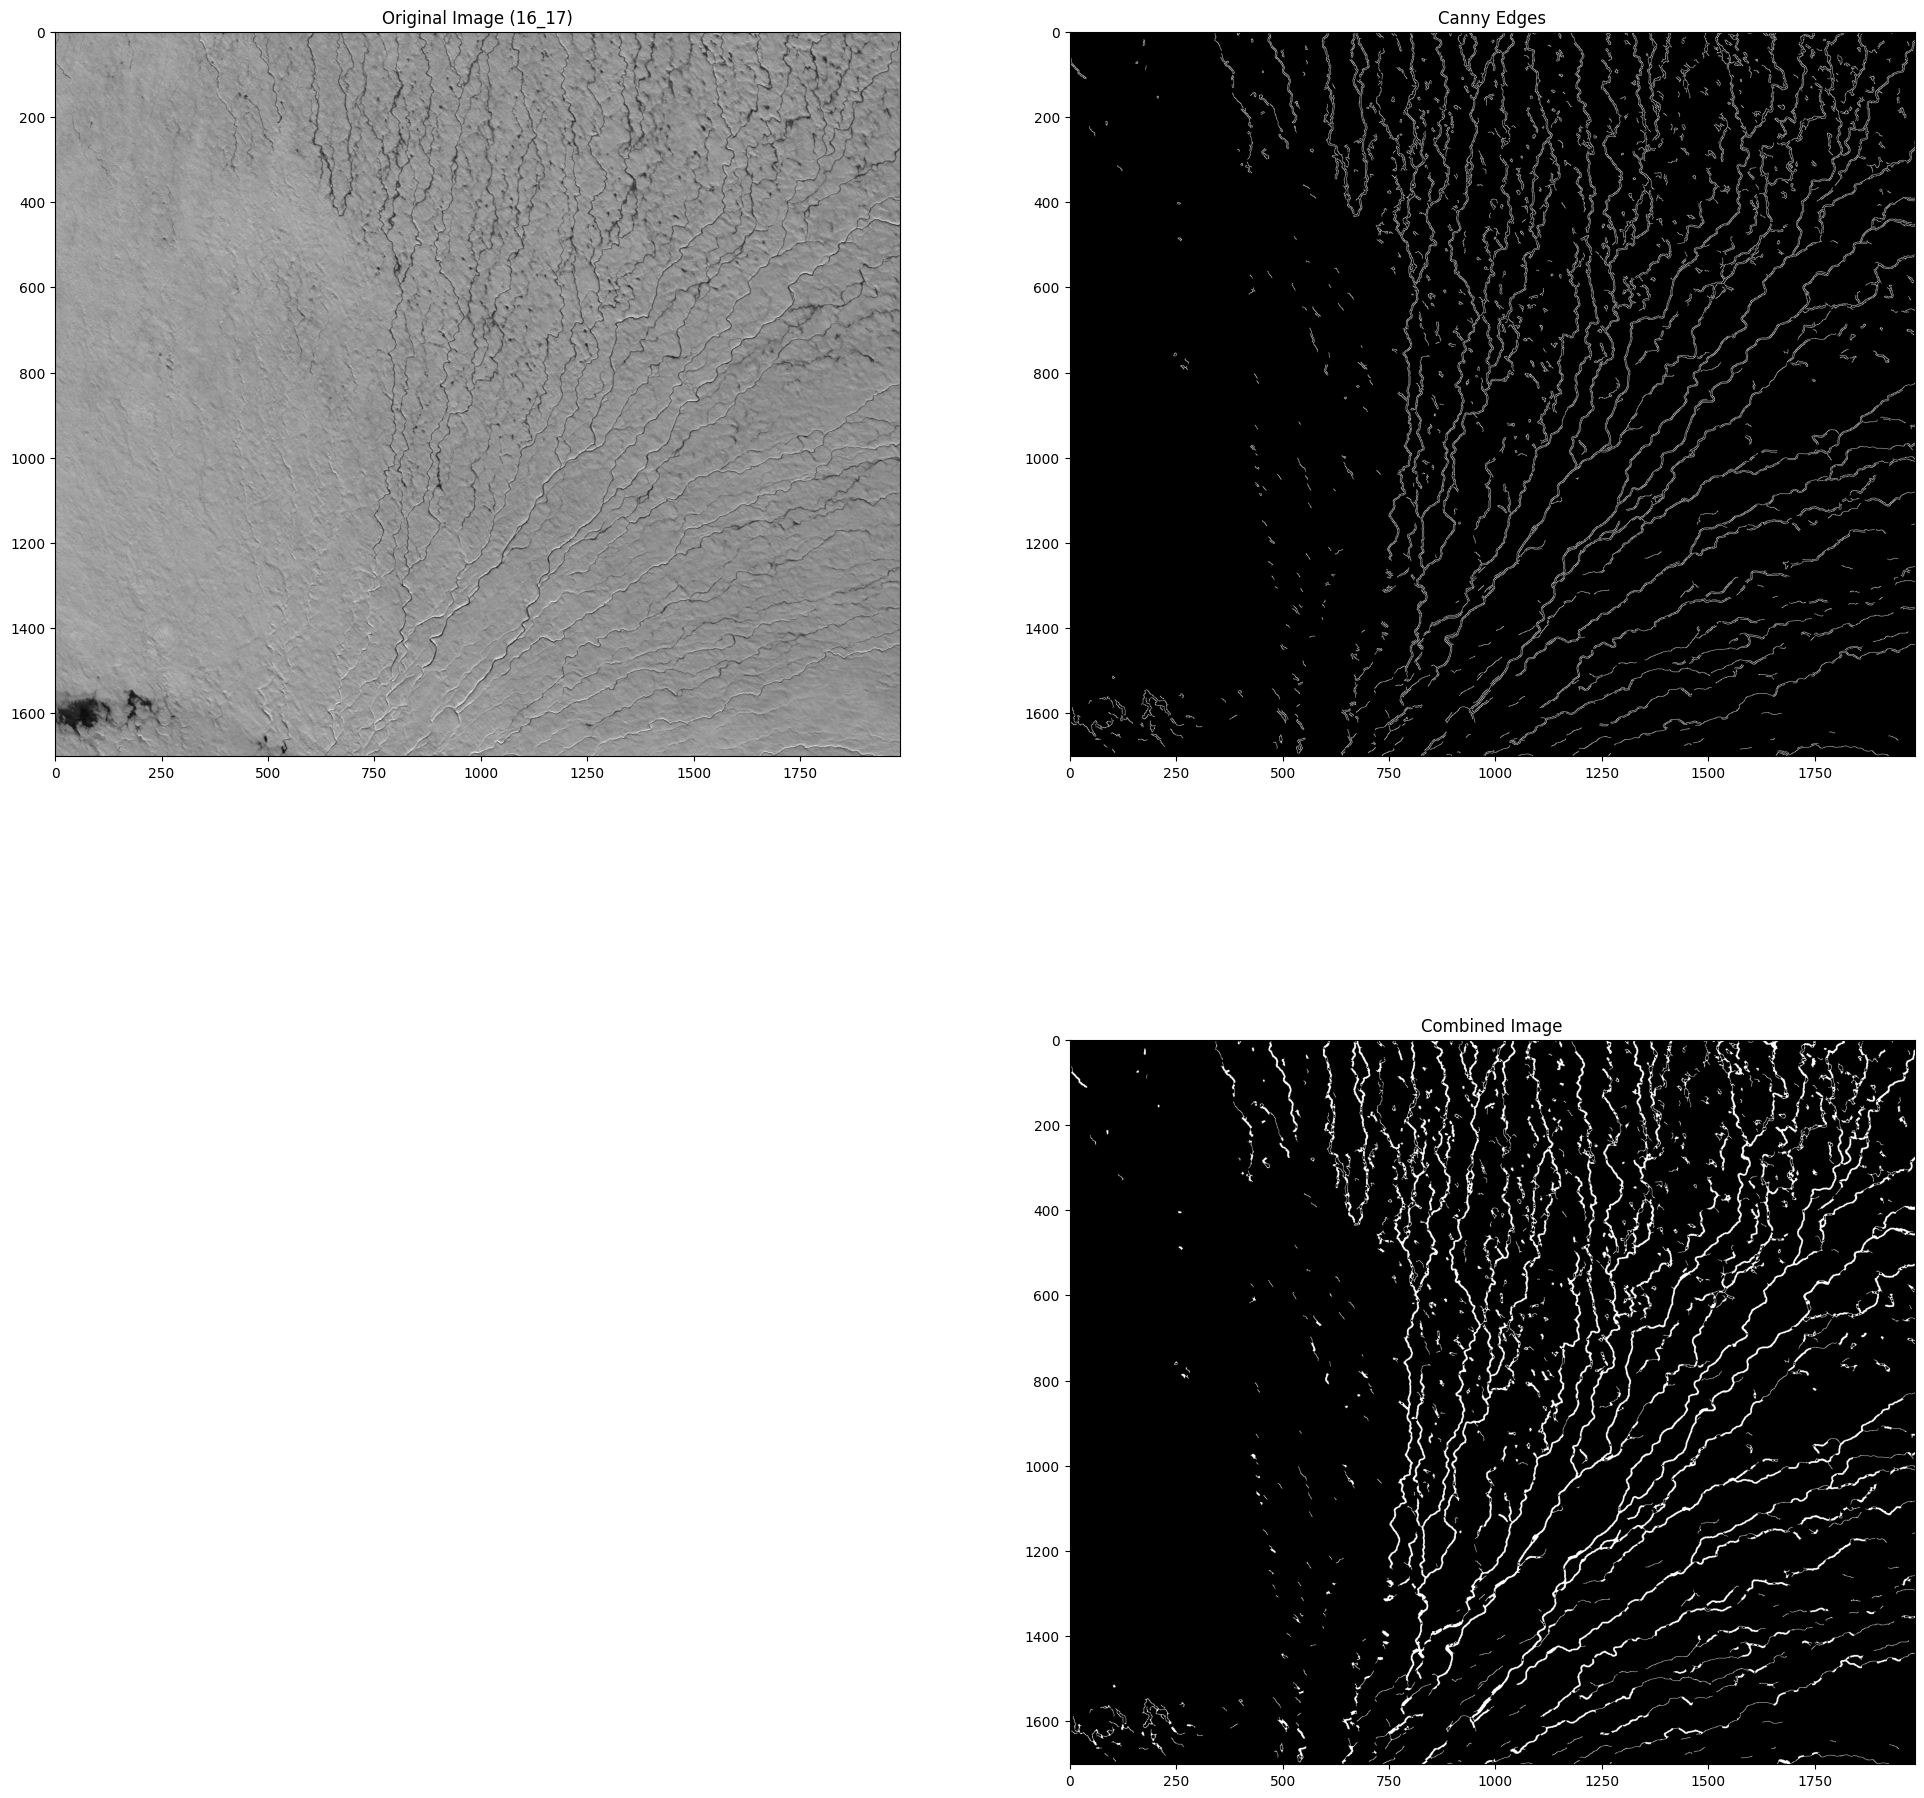

In [5]:
#FOR STREAMS
i = "16_1"
img = cv2.imread(f"data/data/v4_split_image/v4_{i}.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=40, threshold2=80)

kernel = np.ones((2, 2), np.uint8)

# Apply morphological closin
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Combine the line image with the original image
combined_image = closed
output_path_combined = f'data/data/v4_split_image/stream_edge_detection/edge_v4_{i}.png'
cv2.imwrite(output_path_combined, combined_image)

# Plot the results
plt.figure(figsize=(24,24))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image ({i})')
plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
#plt.subplot(2, 2, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Detected Linear Lines')
plt.subplot(2, 2, 4), plt.imshow(combined_image, cmap='gray'), plt.title('Combined Image')
plt.show()

In [4]:
def apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

In [23]:
# Apply Hough Line Transform
def filter_lines_by_angle(lines, min_angle, max_angle):
    filtered_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            if min_angle <= angle <= max_angle:
                filtered_lines.append((x1, y1, x2, y2))
    return filtered_lines

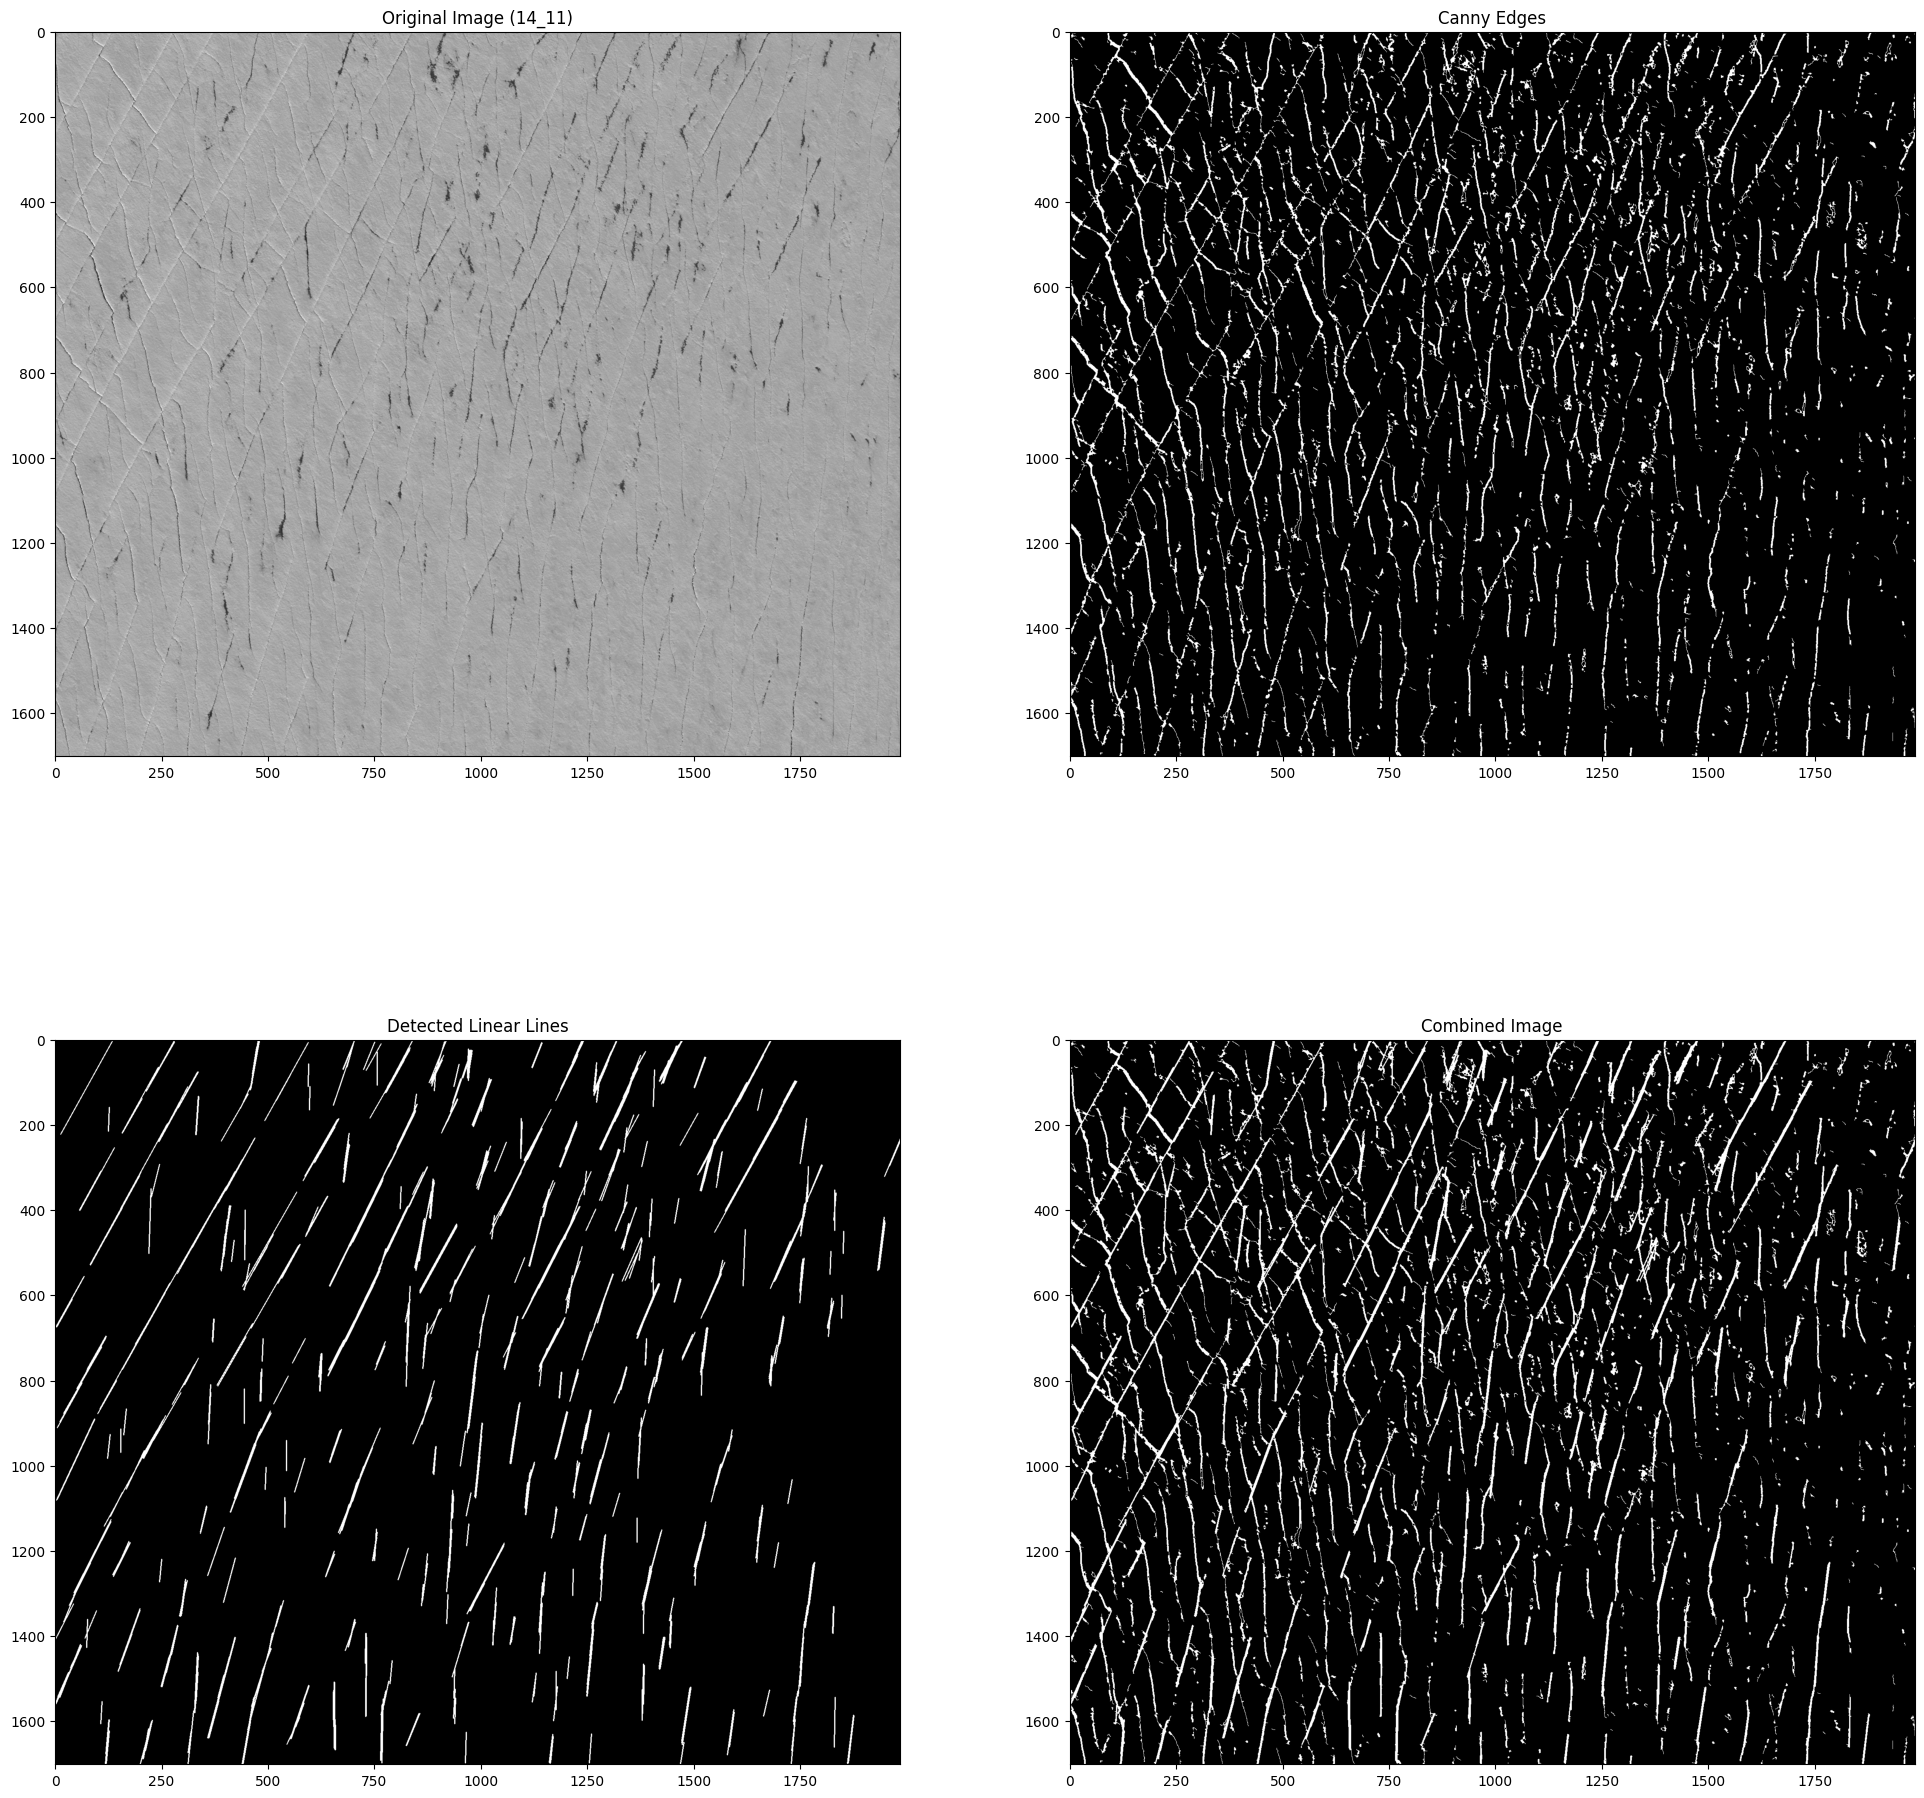

In [76]:
#FOR BOTH

i = "14_11"
img = cv2.imread(f"data/data/v4_split_image/v4_{i}.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=20, threshold2=40)

kernel = np.ones((2, 2), np.uint8)

# Apply morphological closin
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

line_image = np.zeros_like(img)

lines = cv2.HoughLinesP(closed, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=15)

# Create an empty image to draw lines
line_image = np.zeros_like(img)

min_angle = 90
max_angle = 120

# Function to calculate the angle of a line segment
def calculate_angle(x1, y1, x2, y2):
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    if angle < 0:
        angle += 180
    return angle

# Create an empty image to draw lines
line_image = np.zeros_like(img)

# Draw lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = calculate_angle(x1, y1, x2, y2)
        if min_angle <= angle <= max_angle:
            cv2.line(line_image, (x1, y1), (x2, y2), 255, 2)


# Combine the line image with the original image
combined_image = cv2.addWeighted(closed, 1, line_image, 1, 0)
output_path_combined = f'data/data/v4_split_image/fracture_edge_detection/edge_v4_{i}.png'
cv2.imwrite(output_path_combined, combined_image)

# Plot the results
plt.figure(figsize=(24,24))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image ({i})')
plt.subplot(2, 2, 2), plt.imshow(closed, cmap='gray'), plt.title('Canny Edges')
plt.subplot(2, 2, 3), plt.imshow(line_image, cmap='gray'), plt.title('Detected Linear Lines')
plt.subplot(2, 2, 4), plt.imshow(combined_image, cmap='gray'), plt.title('Combined Image')
plt.savefig("test.png")
plt.show()

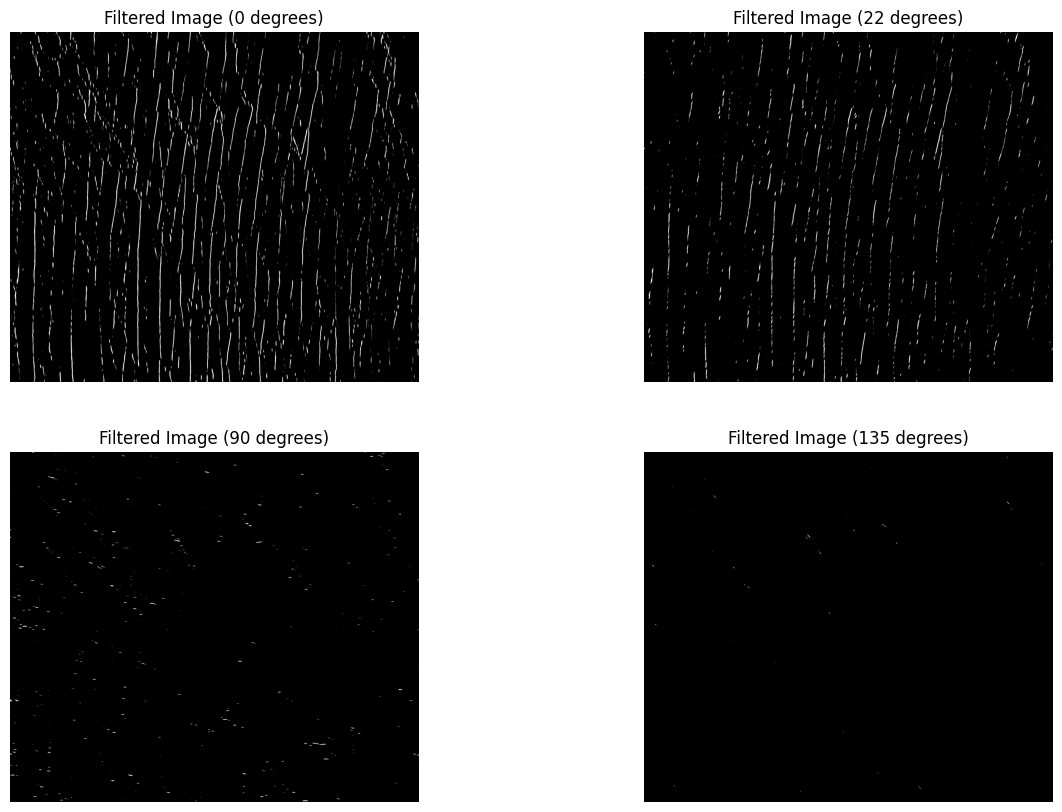

In [125]:
for i in ["6_15"]:
    # Load the image in grayscale
    image_path = f"data/data/v4_split_image/v4_{i}.png"
    img = cv2.imread(image_path)
    #edges = cv2.Canny(image=img, threshold1=20, threshold2=40)

    # Define Gabor filter parameters
    ksize = 19         # Size of the filter (ksize x ksize)
    sigma = 4.0        # Standard deviation of the Gaussian function
    lambd = 10.0       # Wavelength of the sinusoidal factor
    gamma = 0.5        # Spatial aspect ratio
    psi = 0            # Phase offset
    
    def apply_gabor_filter(img, thetas):
        filtered_images = []
        for theta in thetas:
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)
            filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
            filtered_img = cv2.bitwise_not(filtered_img)
            filtered_images.append(filtered_img)
        return filtered_images

    # List of angles (e.g., 0, 45, 90, 135 degrees)
    thetas = [0, np.pi / 8, np.pi / 2, 3 * np.pi / 4]

    # Apply Gabor filter at multiple orientations
    filtered_images = apply_gabor_filter(img, thetas)

    # Display results for each orientation
    plt.figure(figsize=(15, 10))
    for i, (theta, filtered_img) in enumerate(zip(thetas, filtered_images)):
        plt.subplot(2, 2, i + 1)
        plt.title(f'Filtered Image ({int(np.degrees(theta))} degrees)')
        plt.imshow(filtered_img, cmap='gray')
        plt.axis('off')
    plt.show()

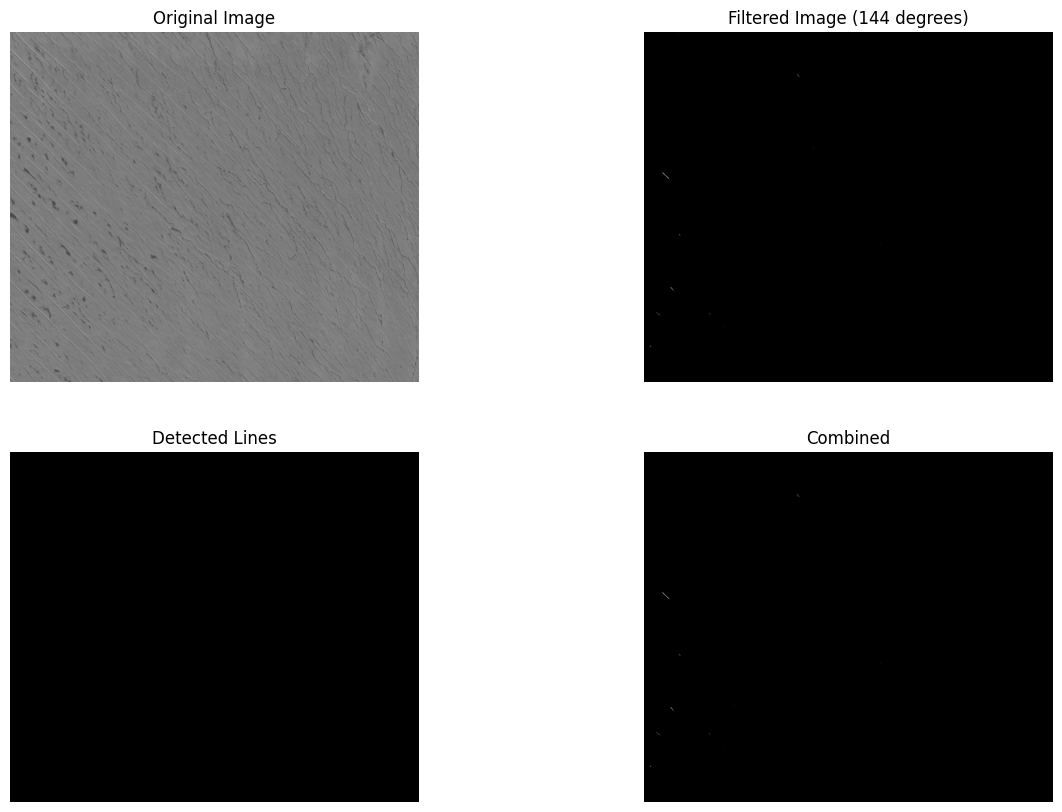

In [79]:
for i in ["5_2"]:
    # Load the image in grayscale
    image_path = f"data/data/v4_split_image/v4_{i}.png"
    img = cv2.imread(image_path)
    #edges = cv2.Canny(image=img, threshold1=20, threshold2=40)

    # Define Gabor filter parameters
    ksize = 15        # Size of the filter (ksize x ksize)
    sigma = 4.0        # Standard deviation of the Gaussian function
    lambd = 10.0       # Wavelength of the sinusoidal factor
    gamma = 0.5        # Spatial aspect ratio
    psi = 0            # Phase offset
    
    def apply_gabor_filter(img, theta):
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi)
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        filtered_img = cv2.bitwise_not(filtered_img)
        return filtered_img

    # List of angles (e.g., 0, 45, 90, 135 degrees)
    theta = 4*np.pi/5

    # Apply Gabor filter at multiple orientations
    filtered_img = apply_gabor_filter(img, theta)
    
    # Apply Canny Edge Detector
    edges = cv2.Canny(filtered_img, 50, 100)

    # Use Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)
    
    line_img = np.zeros_like(img)
    
    # Draw lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Save the result
    combined_img = cv2.addWeighted(filtered_img, 1, line_img, 0, 0)
    output_path_combined = f'data/data/v4_split_image/fracture_edge_detection/edge_v4_{i}.png'
    #cv2.imwrite(output_path_combined, combined_image)
    '''
    blue_color = (0, 0, 255)  # Blue color in BGR

    # Define a mask to find white pixels
    # The condition checks if all three channels are close to 255
    mask = cv2.inRange(combined_img, np.array([200, 200, 200]), np.array([255, 255, 255]))

    # Replace white pixels with blue
    combined_img[mask != 0] = blue_color
    '''
    
    blended_img = cv2.addWeighted(img, 1, combined_img, 0.5, 0)
    
    # Display results for each orientation
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.title(f'Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.title(f'Filtered Image ({int(np.degrees(theta))} degrees)')
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.title(f'Detected Lines')
    plt.imshow(line_img, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.title(f'Combined')
    plt.imshow(combined_img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    

In [26]:
for i in fractures:
    img = cv2.imread(f"data/data/v4_split_image/v4_{i}.png", cv2.IMREAD_GRAYSCALE)
    # Apply Gaussian blur to the image
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=30, threshold2=60)

    kernel = np.ones((2, 2), np.uint8)

    # Apply morphological closin
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=3)

    lines = cv2.HoughLinesP(closed, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

    # Create an empty image to draw lines
    line_image = np.zeros_like(img)

    # Draw lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), 255, 2)

    # Combine the line image with the original image
    combined_image = cv2.addWeighted(closed, 1, line_image, 1, 0)
    
    
    '''
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to draw contours
    contour_image = np.zeros_like(img)

    # Filter and draw curvy lines (excluding contours that might represent ponds)
    for contour in contours:

        area = cv2.contourArea(contour)
        if area > 50:  # Filter based on area to exclude small ponds
            # Calculate the aspect ratio to exclude circular shapes (ponds)
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            if aspect_ratio > 2:  # Adjust the aspect ratio as needed
                cv2.drawContours(contour_image, [contour], -1, (255), thickness=cv2.FILLED)

    # Combine the lines image with the contour image
    combined_image = cv2.addWeighted(lines_image, 1, contour_image, 1, 0)

    # Save the result
    output_path_combined = 'detected_lines.png'
    cv2.imwrite(output_path_combined, combined_image)
    '''
    # Plot the results
    plt.figure(figsize=(24,24))
    plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image ({i})')
    plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
    plt.subplot(2, 2, 3), plt.imshow(line_image, cmap='gray'), plt.title('Detected Linear Lines')
    plt.subplot(2, 2, 4), plt.imshow(combined_image, cmap='gray'), plt.title('Combined Image')
    plt.show()

NameError: name 'fractures' is not defined

In [ ]:
# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=3, ksize=5)

# Combined X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# Canny Edge Detection
canny = cv2.Canny(image=img_blur, threshold1=20, threshold2=100)

# Plotting using Matplotlib
plt.figure(figsize=(12, 6))

# Plot Sobel X
plt.subplot(2, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

# Plot Sobel Y
plt.subplot(2, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

# Plot Sobel XY
plt.subplot(2, 2, 3)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y using Sobel()')
plt.axis('off')

# Plot Canny Edge Detection
plt.subplot(2, 2, 4)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
img = cv2.imread("data/data/images/image_10006.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=100)

kernel = np.ones((3, 3), np.uint8)
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges_closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours
contour_image = np.zeros_like(img)

# Draw contours on the image
cv2.drawContours(contour_image, contours, -1, (255), thickness=cv2.FILLED)

# Combine the contour image with the original image
combined_image = cv2.addWeighted(img, 1, contour_image, 1, 0)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(1, 3, 3), plt.imshow(contour_image, cmap='gray'), plt.title('Detected Contours')
plt.show()